In [6]:
#import the postgresql database
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/Employees_db') 
connection = engine.connect()

In [9]:
#import the tables in database
import pandas as pd
salary = pd.read_sql("SELECT * FROM Salaries", connection)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


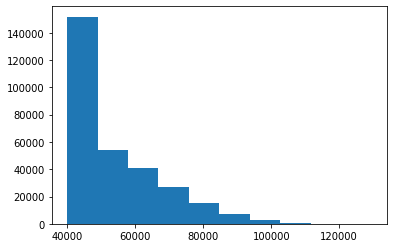

In [10]:
#Create a histogram to visualize the most common salary ranges for employees.
import matplotlib.pyplot as plt
plt.hist(salary.salary)
plt.show()

In [15]:
# read the title table into title 
title=pd.read_sql("SELECT * FROM titles", connection)
title.head()
# employees=pd.read_sql("SELECT * FROM employees", connection)
# employees.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [30]:
# join salary and title via employees
one=salary.merge(employees, left_on='emp_no', right_on='emp_no')
two=one.merge(title,left_on='emp_title_id',right_on='title_id')
two.head()
#avg salary groupby title
avg_salary_per_title=round(two.groupby('title')['salary'].mean(),2)
avg_salary_per_title

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

Text(0, 0.5, 'Average Salary')

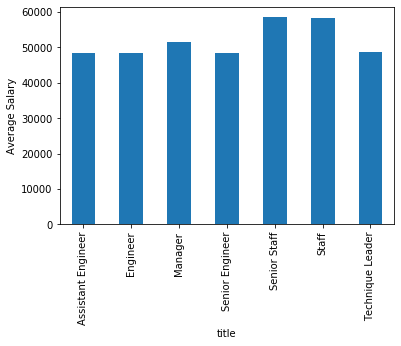

In [38]:
#Create a bar chart of average salary by title.
avg_salary_per_title.plot(kind='bar')
plt.ylabel('Average Salary')